In [19]:
# 1단계
from sklearn.metrics import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# 1. 데이터 로드
df = sns.load_dataset('titanic')

# 2. 5개의 내용 확인
df.head()

# 3. 결손값 유무 확인
df.isnull().sum()

# 4. deck 변수 결손치열, alive(중복 데이터)를 제외하자
drop_list = ["deck","alive"]
df = df.drop(drop_list, axis=1)

# 5. 결손치가 있는 행을 삭제해서 표시
df = df.dropna()
df.isnull().sum()

# 6. 데이터 분할 survived (대상) : 특징이 되는 데이터(Feature Selection) : X
X = df.drop("survived", axis =1)
Y = df["survived"]

# 7. X 데이터의 더미화 확인
X = pd.get_dummies(X)  # 가상 변수를 만들어 범주안에 0 또는 1의 값 지정
X.head()
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [21]:
# 2단계 분류 학습 시작
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.5, random_state=0)

# 데이터의 크기 확인
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(Y.shape)
print(Y_train.shape)
print(Y_test.shape)

(712, 21)
(356, 21)
(356, 21)
(712,)
(356,)
(356,)


In [26]:
# 3단계 로지스틱 회귀 모델의 인스턴스를 만들고 훈련데이터로 학습을 시키자
# 1000번 반복해서 학습 sklearn.linear_model.LogistricRegression
from sklearn.linear_model import LogisticRegression

ir = LogisticRegression(max_iter=1000, random_state=0) # 1000번을 반복해서 판정을 한다.
ir.fit(X_train, Y_train) #학습을 한다

# 4단계 학습 데이터 판정 결과를 test 데이터로 확인하자
y_pred = ir.predict(X_test)
print(y_pred)


[1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 1 0
 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0
 0 0 0 0 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1
 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0
 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0
 0 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 0]


In [33]:
# 5단계 지표를 산출하자 
#  -> 4단계에서 구현한 예측치 y_pred와 test데이터의 실제 값을 사용해서 평가 지표를 구현할 수 있다.
# Kaggle의 titanic 데이터를 이용해서 생존 여부를 나타내는 survived 값을 예측하기 위한 
# Logistic 회귀 모델을 구현하자
from sklearn.metrics import *

print('confusion_matrix : ', confusion_matrix(Y_test, y_pred))
print('accuracy : ', accuracy_score(Y_test, y_pred))
print('precision : ', precision_score(Y_test, y_pred))
print('recall : ', recall_score(Y_test, y_pred))
print('f1 score : ', f1_score(Y_test, y_pred))

confusion_matrix :  [[179  31]
 [ 40 106]]
accuracy :  0.800561797752809
precision :  0.7737226277372263
recall :  0.726027397260274
f1 score :  0.7491166077738517


In [35]:
# 번외1. Log loss 기법 : 확률을 입력으로 분류하는 기법의 성능 평가
# 먼저 모델에서 Y가 0인 확률을 예측해서 확인
# 로지스틱 회귀모델에서 대상을 0과 1로 분류되는 확률을 각각 출력 하고 싶을 경우 predict_proba()

# 모델에서 Y가 0인 확률을 예측해서 확인
probs = ir.predict_proba(X_test)
print(probs[:5])

[[0.48061197 0.51938803]
 [0.80028107 0.19971893]
 [0.02380526 0.97619474]
 [0.85349269 0.14650731]
 [0.94115893 0.05884107]]


ROC 곡선과 PR 곡선은 데이터가 Positive일 확률 모델에서 예측하여 positive일 경우가 높다고 예측하고 순서대로 정렬한다.
예측한 확률에서 positive일 경우의 판정기준(임계값)을 깃점으로 FPR, TPR이 어떻게 변화하는지를 확인하는 것이 ROC 곡선 적합율(precision)와 재현율(recall, TPR)의 변화를 나타낸 것이 PR곡선이다.

In [40]:
# 번외2. ROC 곡선, PR 곡선, 각각의 AUC 산출
from sklearn.metrics import *

#테스트 데이터가 클래스 1에 속하는 확률을 예측하고 그 확률에서 FPR, TPR, 임계값을 계산해보자
Y_score = ir.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_score)

#값을 테이블로 확인
df = pd.DataFrame([ fpr,tpr,thresholds ])
df.T

,0,1,2
0,0.000000,0.000000,1.994756
1,0.000000,0.006849,0.994756
2,0.000000,0.027397,0.983053
3,0.004762,0.027397,0.982462
4,0.004762,0.136986,0.956457
...,...,...,...
100,0.871429,0.986301,0.062995
101,0.871429,0.993151,0.062939
102,0.914286,0.993151,0.054308
103,0.914286,1.000000,0.054110


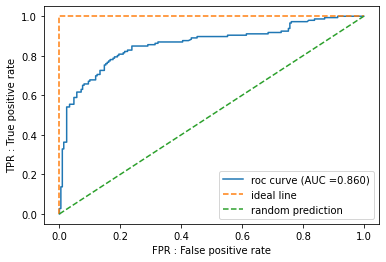

In [43]:
# 번외3. plot 해보자
plt.plot(fpr,tpr, label='roc curve (AUC =%.3f)' %auc(fpr,tpr))
plt.plot([0,0,1],[0,1,1], linestyle='--', label = 'ideal line')
plt.plot([0,1],[0,1], linestyle='--', label = 'random prediction')
plt.legend()
plt.xlabel('FPR : False positive rate')
plt.ylabel('TPR : True positive rate')
plt.show()

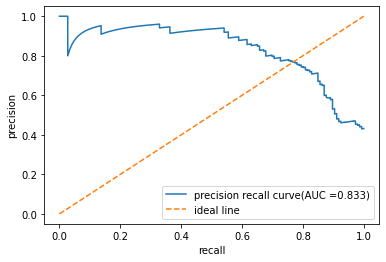

In [46]:
# 번외4. PR 곡선

probas_pred = ir.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(Y_test, probas_pred)

plt.plot(recall,precision, label='precision recall curve(AUC =%.3f)' %auc(recall, precision))
plt.plot([0,1],[0,1], linestyle='--', label = 'ideal line')
plt.legend()
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()